C:\Users\evert\AppData\Local\Temp\ipykernel_14908\2406304295.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


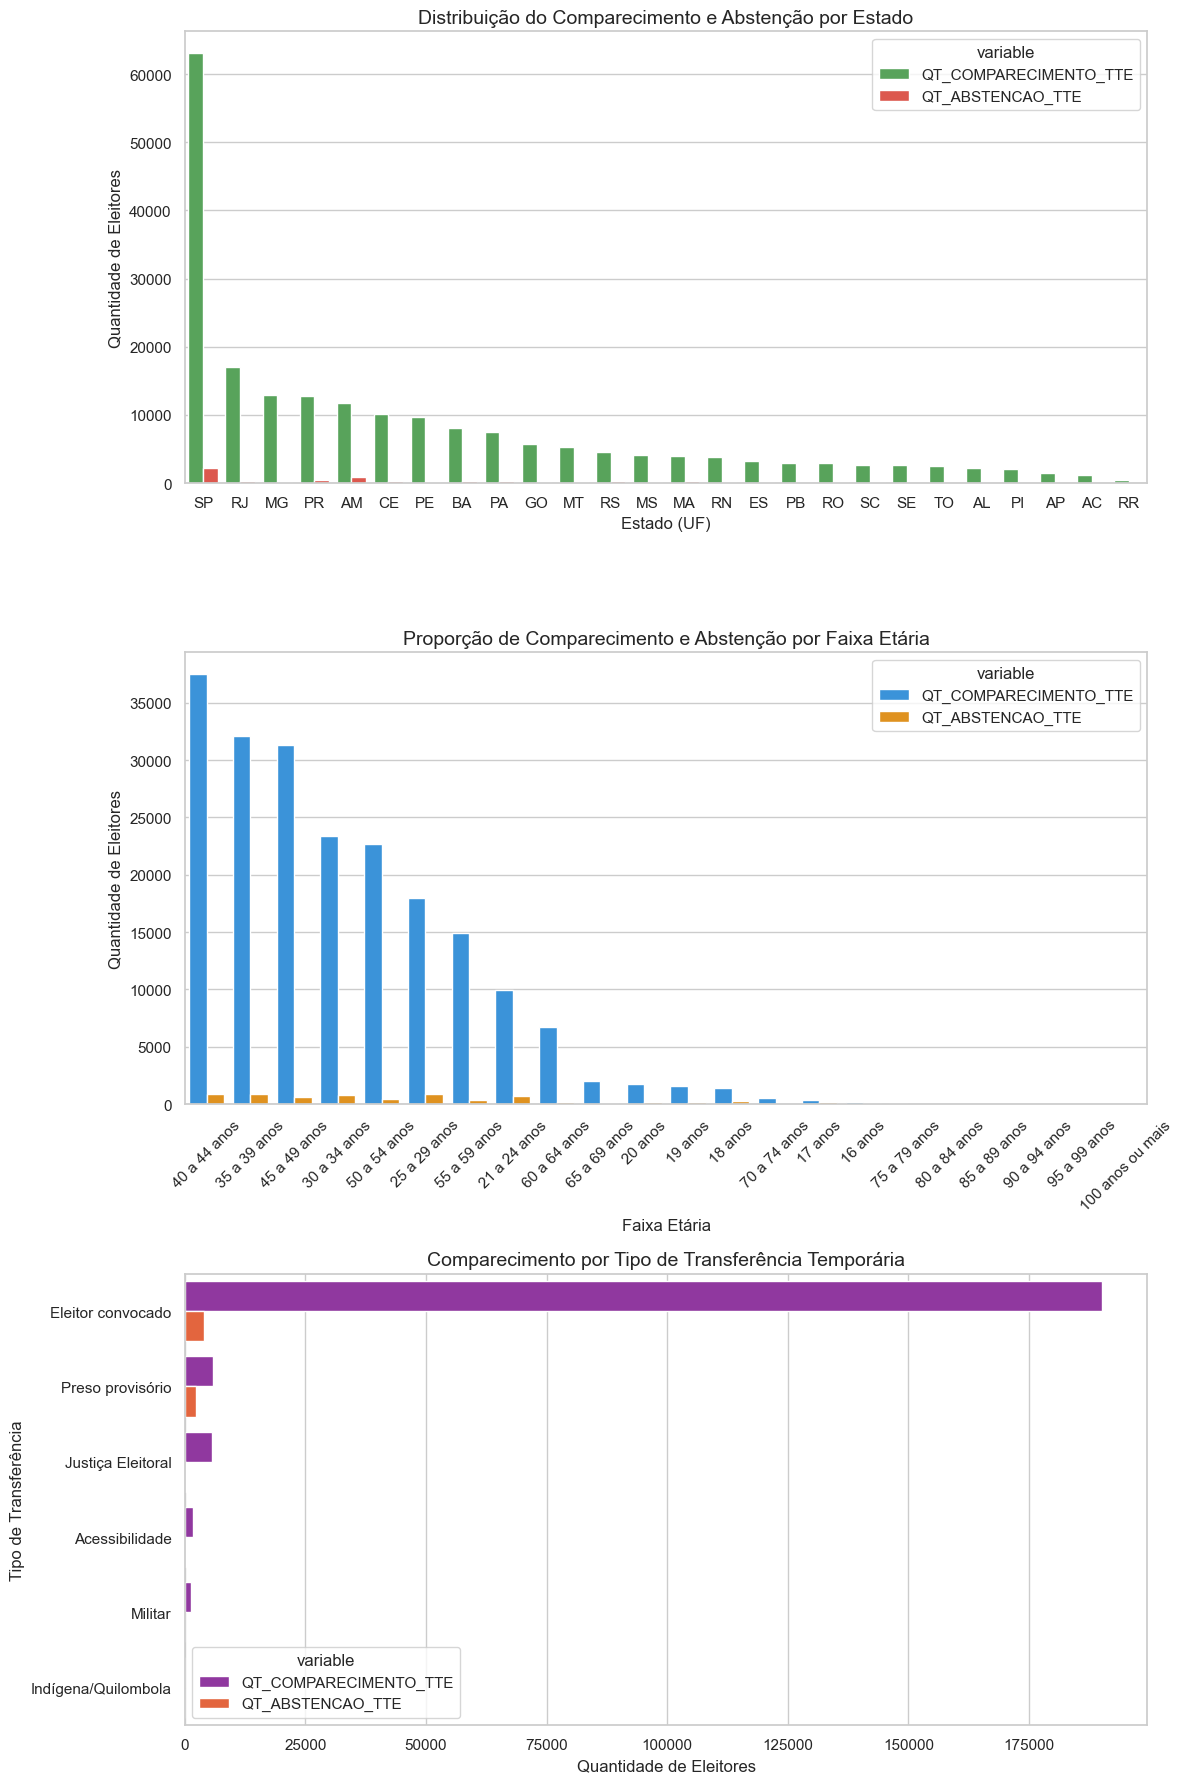

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = r"comparecimento_abstencao_eleitor_tte_2024.csv"
df = pd.read_csv(file_path, encoding="latin1", sep=";")


df["QT_APTOS_EM_TTE"] = pd.to_numeric(df["QT_APTOS_EM_TTE"], errors="coerce")
df["QT_COMPARECIMENTO_TTE"] = pd.to_numeric(df["QT_COMPARECIMENTO_TTE"], errors="coerce")
df["QT_ABSTENCAO_TTE"] = pd.to_numeric(df["QT_ABSTENCAO_TTE"], errors="coerce")


sns.set_theme(style="whitegrid")


fig, axes = plt.subplots(3, 1, figsize=(12, 18))

df_grouped_uf = df.groupby("SG_UF_ORIGEM")[["QT_COMPARECIMENTO_TTE", "QT_ABSTENCAO_TTE"]].sum().reset_index()
df_grouped_uf = df_grouped_uf.sort_values(by="QT_COMPARECIMENTO_TTE", ascending=False)

sns.barplot(data=df_grouped_uf.melt(id_vars="SG_UF_ORIGEM", value_vars=["QT_COMPARECIMENTO_TTE", "QT_ABSTENCAO_TTE"]),
            x="SG_UF_ORIGEM", y="value", hue="variable", palette=["#4CAF50", "#F44336"], ax=axes[0])
axes[0].set_title("Distribuição do Comparecimento e Abstenção por Estado", fontsize=14)
axes[0].set_xlabel("Estado (UF)")
axes[0].set_ylabel("Quantidade de Eleitores")

df_grouped_etaria = df.groupby("DS_FAIXA_ETARIA")[["QT_COMPARECIMENTO_TTE", "QT_ABSTENCAO_TTE"]].sum().reset_index()
df_grouped_etaria = df_grouped_etaria.sort_values(by="QT_COMPARECIMENTO_TTE", ascending=False)

sns.barplot(data=df_grouped_etaria.melt(id_vars="DS_FAIXA_ETARIA", value_vars=["QT_COMPARECIMENTO_TTE", "QT_ABSTENCAO_TTE"]),
            x="DS_FAIXA_ETARIA", y="value", hue="variable", palette=["#2196F3", "#FF9800"], ax=axes[1])
axes[1].set_title("Proporção de Comparecimento e Abstenção por Faixa Etária", fontsize=14)
axes[1].set_xlabel("Faixa Etária")
axes[1].set_ylabel("Quantidade de Eleitores")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

df_grouped_tte = df.groupby("DS_TIPO_TRANSFERENCIA")[["QT_COMPARECIMENTO_TTE", "QT_ABSTENCAO_TTE"]].sum().reset_index()
df_grouped_tte = df_grouped_tte.sort_values(by="QT_COMPARECIMENTO_TTE", ascending=False)

sns.barplot(data=df_grouped_tte.melt(id_vars="DS_TIPO_TRANSFERENCIA", value_vars=["QT_COMPARECIMENTO_TTE", "QT_ABSTENCAO_TTE"]),
            y="DS_TIPO_TRANSFERENCIA", x="value", hue="variable", palette=["#9C27B0", "#FF5722"], ax=axes[2])
axes[2].set_title("Comparecimento por Tipo de Transferência Temporária", fontsize=14)
axes[2].set_xlabel("Quantidade de Eleitores")
axes[2].set_ylabel("Tipo de Transferência")

plt.tight_layout()
plt.show()
